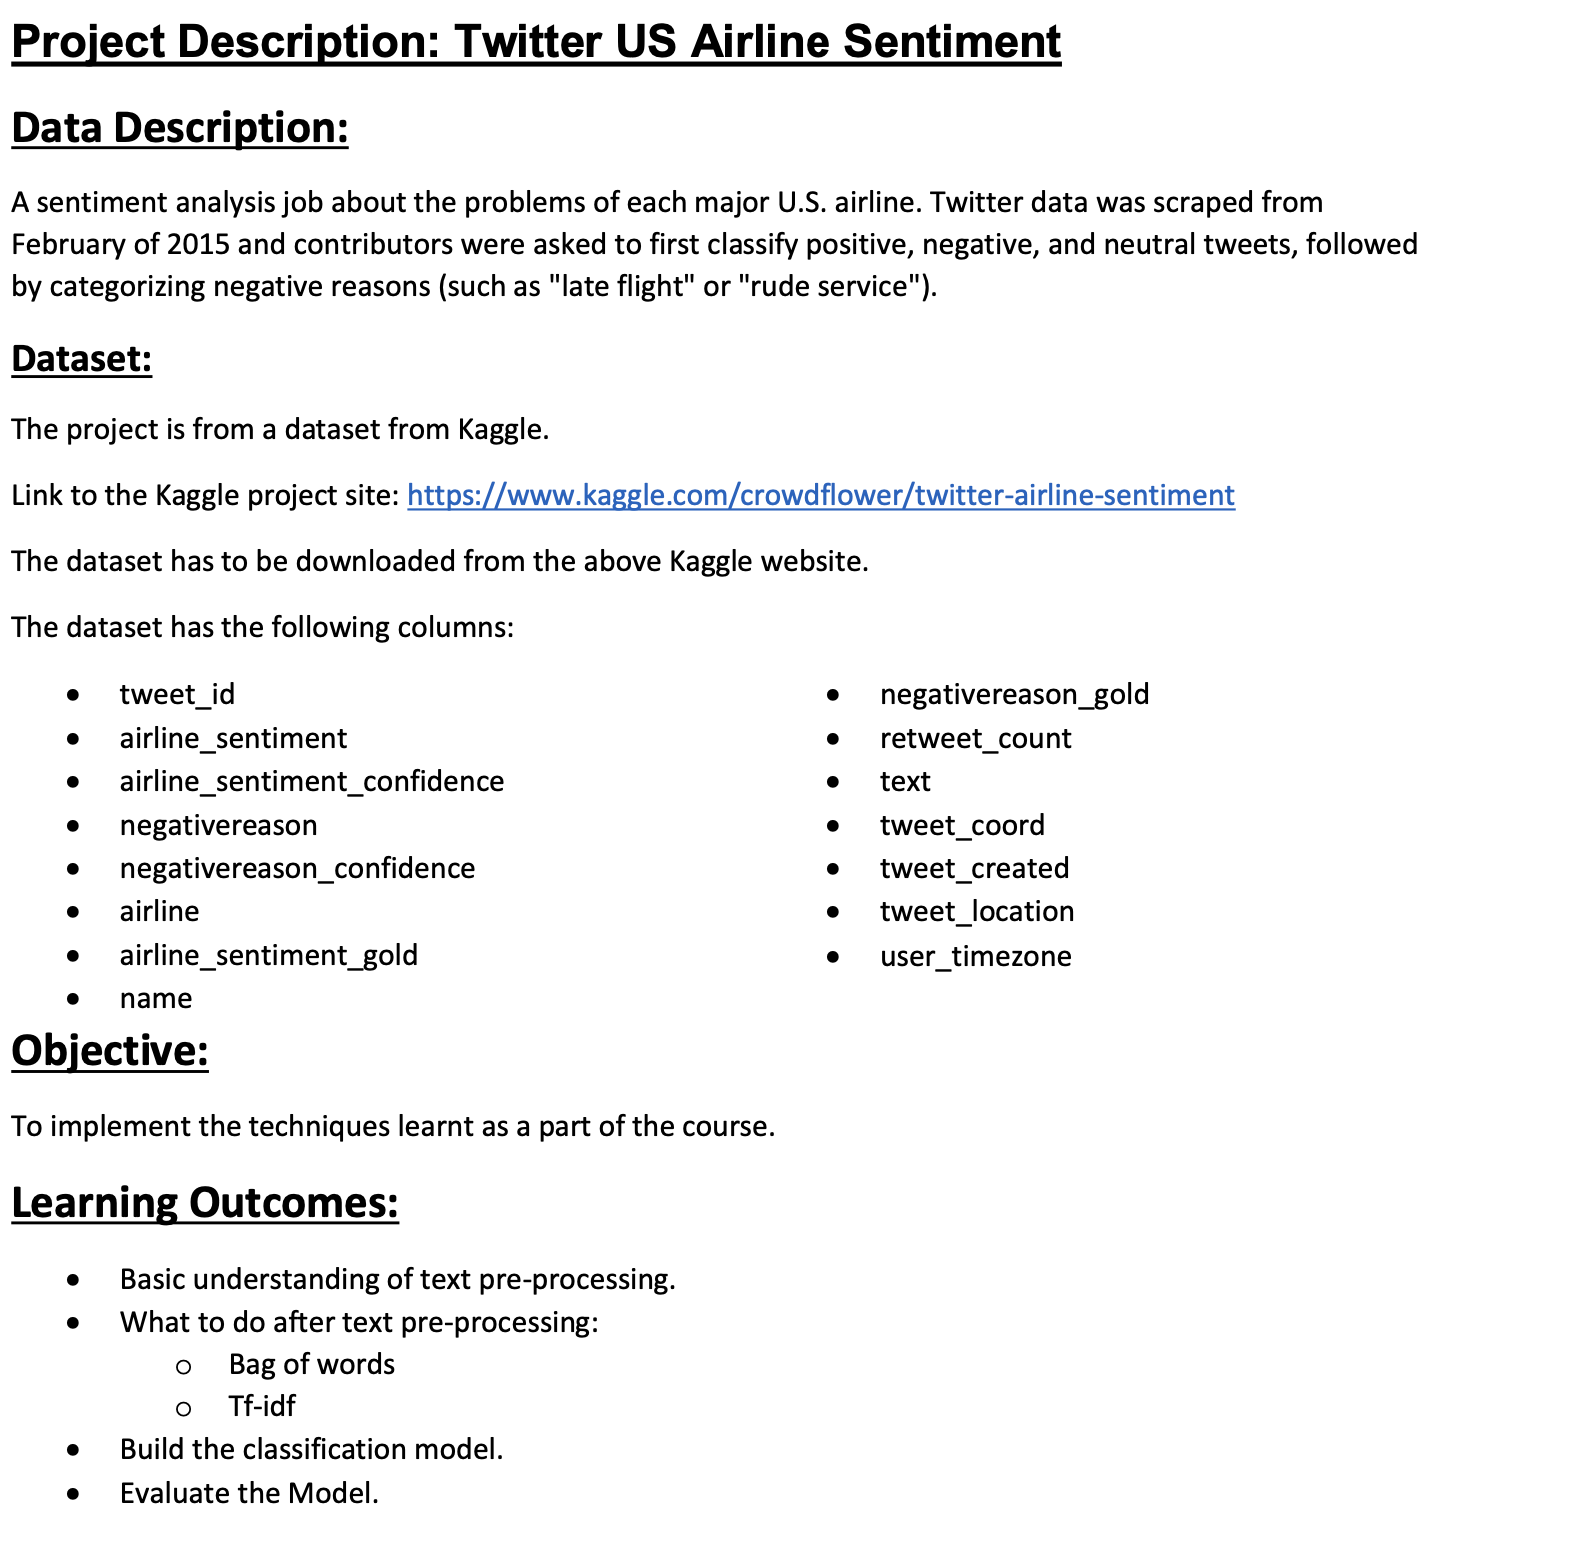

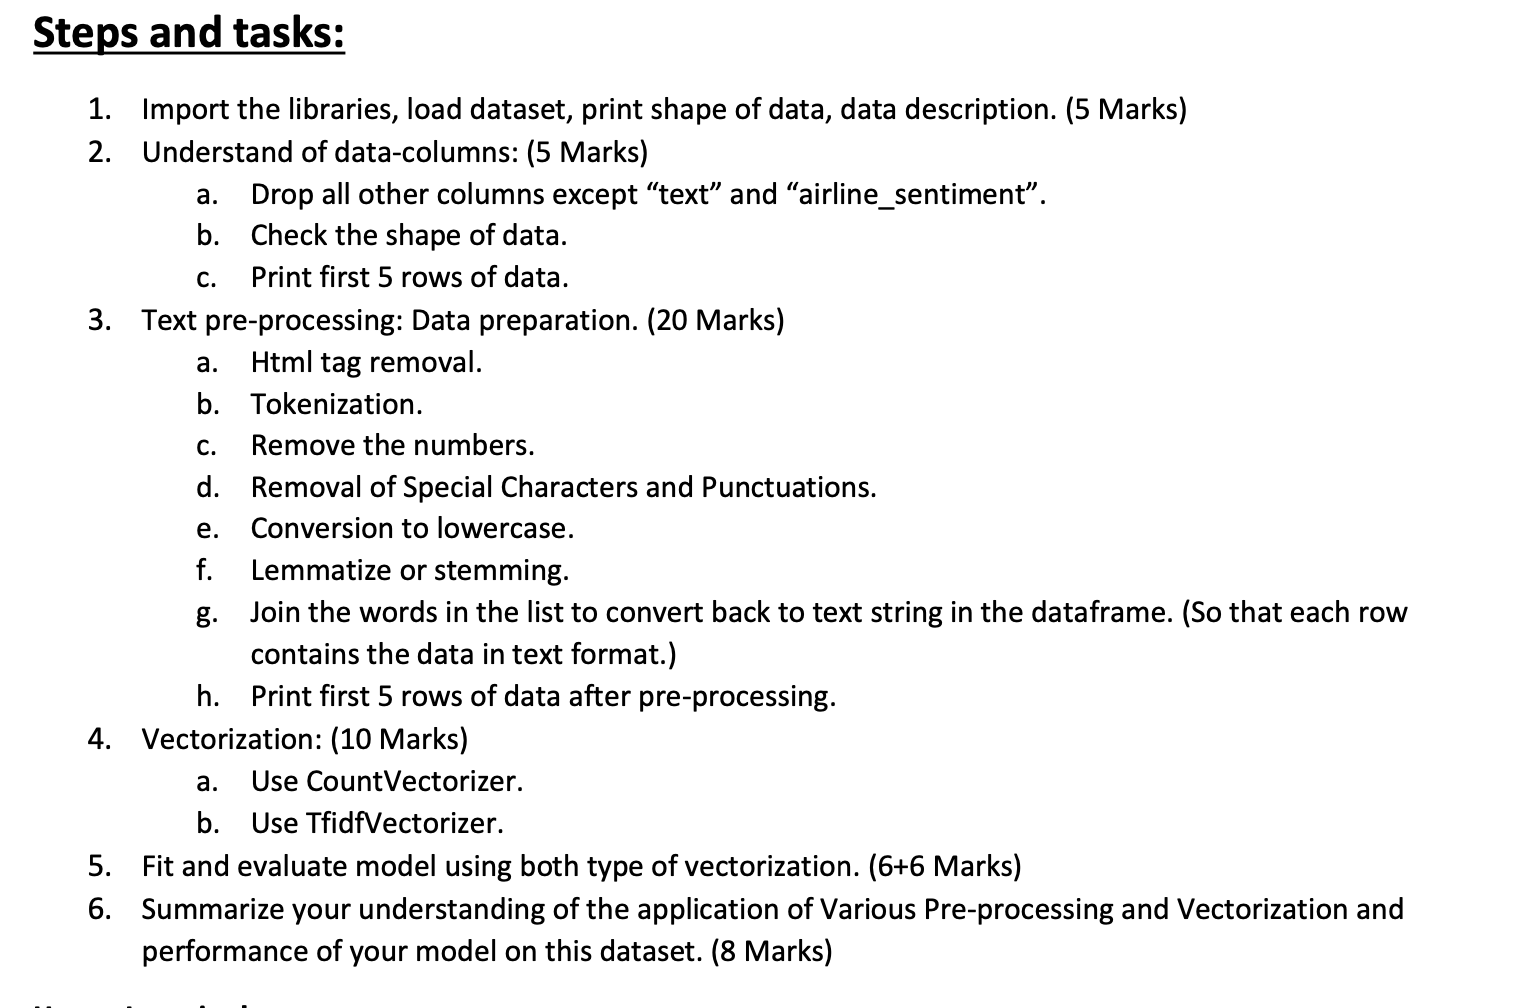

GitHub: https://github.com/wbasnight/AIML


1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)


In [1]:
# Importing libraries.
import pandas as pd
import numpy as np

import re, string, unicodedata
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install contractions
import contractions


from bs4 import BeautifulSoup  
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Mounting the Google Drive

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading the data file
TweetsData = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 8/Tweets.csv')

#check the file - display the first 5 rows of Tweets.csv
TweetsData.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# To display entire text column contents - no truncating
pd.set_option('display.max_colwidth', None)

In [5]:
# displays the shape (rows and columns) of the data in the dataframe.
TweetsData.shape

(14640, 15)

In [6]:
# displaying the column info
TweetsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.


In [7]:
# Deleting all columns except airline_sentiment and text

TextData = TweetsData.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 
                     'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [8]:
# displaying the column info
TextData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [9]:
# displays the shape (rows and columns) of the data in the dataframe.
TextData.shape

(14640, 2)

In [10]:
#check the file - display the first 5 rows of Tweets.csv
TextData.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.


In [11]:
# Remove http links in the text column
for i, row in TextData.iterrows():
    nohttp_text = re.sub(r"http\S+", "", TextData.at[i, 'text'])
    TextData.at[i,'text'] = nohttp_text
TextData.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [12]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in TextData.iterrows():
    text = TextData.at[i, 'text']
    nocontractions_text = replace_contractions(text)
    TextData.at[i,'text'] = nocontractions_text
TextData.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [13]:
# Tokenize the words 
for i, row in TextData.iterrows():
    Tokentext = TextData.at[i, 'text']
    Twords = nltk.word_tokenize(Tokentext)
    TextData.at[i,'text'] = Twords
TextData.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [14]:
# Removing non-ASCII characters from the text in the text column

def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [15]:
# Converting all characters in the text column to lowercase

def to_lowercase(words):
    new_words = []      
    for word in words:
        new_word = word.lower()  
        new_words.append(new_word)   
    return new_words

In [16]:
# Removing punctuation from the text in the text column

def remove_punctuation(words):
    new_words = []   
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)   
    return new_words



In [17]:
# Removing numbers from the text in the text column

def remove_numbers(words):
    new_words = []  
    for word in words:
        new_word = re.sub(r'[\d]', '', word)
        if new_word != '':
            new_words.append(new_word)   
    return new_words


In [18]:
# Removing stop words from the text in the text column

def remove_stopwords(words):
    new_words = []   
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)  
    return new_words

In [19]:
# Converting tokenized words into the root form using Stemming

def stem_words(words):
    stemmer = LancasterStemmer()
    stems = [] 
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)    
    return stems

In [20]:
# Calling the functions above to normalize the text

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    words = stem_words(words)
    return ' '.join(words)


In [21]:
# Iterate the normalize funtion over whole data.

for i, row in TextData.iterrows():
    words = TextData.at[i, 'text']
    words = normalize(words)
    TextData.at[i,'text'] = words
TextData.head()

,airline_sentiment,text
0,neutral,virginameric dhepburn said
1,positive,virginameric plu ad commerc expery tacky
2,neutral,virginameric today must mean nee tak anoth trip
3,negative,virginameric real aggress blast obnoxy entertain guest fac amp littl recours
4,negative,virginameric real big bad thing


4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.


In [22]:
# Using CountVectorizer
# Vectorization (Convert text data to numbers).

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()             
CVecData = vectorizer.fit_transform(TextData['text'])

CVecData = CVecData.toarray()                        

In [23]:
CVecData.shape


(14640, 9068)

5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

In [24]:
labels = TextData['airline_sentiment']


In [25]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CVecData, labels, test_size=0.3, random_state=42)

In [27]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

CVecScore = (np.mean(cross_val_score(forest, CVecData, labels, cv=10)))
print (CVecScore)

0.7118852459016394


In [28]:
# Use TfidfVectorizer

# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TFVecData = vectorizer.fit_transform(TextData['text'])

TFVecData = TFVecData.toarray()


In [29]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.


forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

TFVecScore = (np.mean(cross_val_score(forest, TFVecData, labels, cv=10)))
print (TFVecScore)

0.7003415300546448


In [30]:
# Scores using no max feature vectorization value

col={'Count Vectorization':CVecScore,'Tfidf Vectorization':TFVecScore}
vec=['Score']
dfScore=pd.DataFrame(data=col,index=vec)
dfScore

,Count Vectorization,Tfidf Vectorization
Score,0.711885,0.700342


In [29]:
# Using Max features = 1500 in Vectorization

col={'Count Vectorization':CVecScore2,'Tfidf Vectorization':TFVecScore2}
vec=['Score']
dfScore=pd.DataFrame(data=col,index=vec)
dfScore

,Count Vectorization,Tfidf Vectorization
Score,0.701913,0.698497



6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)


The dataset has a sentiment of positive, neutral or negative with tweet comments.

A series of preprocessing techniques were used to "prepare" the data for the model.  

Techniques used were (in the following order):
  
*   Converting contractions
*   Tokenizing all words
*   Removing special characters
*   Converting the text to all lower case
*   Removing the puncuation
*   Removing all numbers
*   Removing stopwords
*   Reducing words to it's root form (stemming)

Once the preprocessing is complete, the unique words were counted using CountVectorizor and TfidfVectorzier then the training and test sets configured and fit the model.

In my findings using the count vectorizor and Tfidf vectorizer with out using max features, the model out performed when using max features = 1500.


The model also performed slightly higher using CountVectorizaion in both scenarios:



	





    

    

    

    

    


 




In [ ]:
No max features:
Count Vectorization	0.711885
Tfidf Vectorization 0.700342


In [ ]:
Max features = 1500
Count Vectorization	0.701913
Tfidf Vectorization 0.698497

